## Let's start with Harry Markowitz's modern portfolio theory (MPT)
Our return on our overall portfoilio, denoted $R_p$, can be specified as the sum of the individual shares of a certain asset in your portfolio times the return of the asset. When you invest in n assets, this can be written as: $$R_p = \sum_{i=1}^n w_i R_i$$ and the expected return would be: $$E(R_p) = \sum_{i=1}^n w_i E(R_i)$$

The variance of the return of the portfolio $\sigma_p^2$ can be written as: $$\sigma_p^2 = \sum_{i} w_i^2 \sigma_i^2 + \sum_{i}\sum_{j\neq i}w_i w_j \sigma_i \sigma_j corr(i,j) \\ = \sum_{i}\sum_{j}w_i w_j cov(i,j)$$ where $cov(i,j) = 1$ when $i=j$. So the risk, measured as the standard deviation of $E(R_p)$ is: $$\sqrt{\sum_{i}\sum_{j}w_i w_j cov(i,j)}$$

Let's code these formulas to get the expected risk and return of a portfoilio. 

In [29]:
def expected_value(stock_return_vec):
    n = len(stock_return_vec)
    val = 0
    for i in range(n):
        val += (stock_return_vec[i]*(1/n))
    return val

# takes in a vector of the overall share of each stock in your portfolio,
# and a list of lists with the returns of each stock
#the lengths of these vectors should be equivalent
def expected_return_port(weights, stock_vecs):
    exp_port = 0
    n = len(stock_vecs)      
    for i in range(n):
        exp_port += (expected_value(stock_vecs[i]))*weights[i]
    return exp_port


### Let's test these functions. I have 3 stocks, A, B, and C. Over 5 days their retruns are (0,7.2,7.1,-5,11.5), (-1.4,4.5,7.1,3.2,2.2), and (7.2,1.2,1.2,4,12.9) respectively. 

In [30]:
ret_A = [0,7.2,7.1,-5,11.5]
ret_B = [-1.4,-4.5,7.1,3.2,2.2]
ret_C = [7.2,1.2,1.2,4,12.9]

### Their expected values are:

In [31]:
exp_A = expected_value(ret_A) 
exp_B = expected_value(ret_B) 
exp_C = expected_value(ret_C)

print(exp_A)
print(exp_B)
print(exp_C)

4.16
1.3200000000000003
5.300000000000001


### Say I invest 20% of my money in A, 40% of my money in B and 40% of my money in C. Then, the expected return on my portfoilio would be:

In [32]:
portfolio = [ret_A, ret_B, ret_C]
shares = [.2,.4,.4]
print(expected_return_port(shares, portfolio))

3.480000000000001


### So my expected retrun on this portfolio would be 4.2%. Now let's calculate the risk of the portflio, measured as the standard deviation of the expected return of the portfolio

In [33]:
from math import sqrt

def var(stock_vec):
    n = len(stock_vec)
    square_vec= []
    for i in range(n):
        square_vec.append(stock_vec[i]*stock_vec[i])
    exp = expected_value(stock_vec)
    var = expected_value(square_vec)-(exp*exp)
    return var

def corr(i,j):
    exp_i = expected_value(i)
    exp_j = expected_value(j)
    n = len(i)
    num = 0
    for k in range(n):
        num += (i[k]-exp_i)*(j[k]-exp_j)
    denom = (sqrt(var(i)))*(sqrt(var(j)))
    corr_coeff = num/denom
    return corr_coeff

def cov(i,j):
    exp_i = expected_value(i)
    exp_j = expected_value(j)
    n = len(i)
    num = 0
    for k in range(n):
        num += (i[k]-exp_i)*(j[k]-exp_j)
    cov_i_j = (1/(n-1))*num
    return cov_i_j
    

def risk_port(weights, stock_vecs):
    var = 0
    for i in range(len(stock_vecs)):
        for j in range(len(stock_vecs)):
            var += weights[i]*weights[j]*cov(stock_vecs[i],stock_vecs[j])
    return sqrt(var)
                
    

In [34]:
### The standard deviations of each individual asset are:

In [35]:
print(sqrt(var(ret_A)))
print(sqrt(var(ret_B)))
print(sqrt(var(ret_C)))

5.881700434398203
3.9746194786419498
4.397271881519267


### And the risk of the portfolio I constructed above with stocks A, B, and C would be:

In [36]:
print(risk_port(shares, portfolio))

3.1781441125285683


### Our goal is to have a portfolio risk smaller that of the individual assets, which we acheived here. We can create an efficient frontier by taking random weights and plotting the expected return and standard deviations

In [37]:
from random import random

def randWeights(size):
    list = []
    total = 0
    for i in range(size):
        num = random()
        list.append(num)
        total += num
    for i in range(size):
        list[i] = list[i]/total
    return list

In [38]:
print(randWeights(3))

[0.2639316336897326, 0.24935883110880422, 0.4867095352014632]


In [39]:
import matplotlib.pyplot as plt
def makeFrontier(stock_vecs):
    returns = []
    stdev = []
    w = []
    for i in range(6000):
        weights = randWeights(len(stock_vecs))
        returns.append(expected_return_port(weights, stock_vecs))
        stdev.append(risk_port(weights, stock_vecs))
        w.append(weights)
    plt.scatter(stdev, returns)
    plt.title("Efficient Frontier")
    plt.xlabel("risk")
    plt.ylabel("return")
    plt.show()

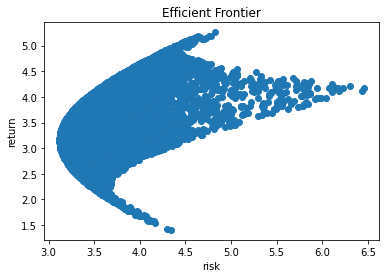

In [40]:
makeFrontier(portfolio)